The intention of this project is to answer the following questyions:

    How many people of each race are represented in this dataset?
    What is the average age of men?
    What is the percentage of people who have a Bachelor's degree?
    What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
    What percentage of people without advanced education make more than 50K?
    What is the minimum number of hours a person works per week?
    What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
    What country has the highest percentage of people that earn >50K and what is that percentage?
    Identify the most popular occupation for those who earn >50K in India.


In [ ]:
!pip install google

In [33]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#loading the dataset from google drive
path = "/content/drive/MyDrive/dataset/adult.data.csv"
df = pd.read_csv(path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB




How many people of each race are represented in this dataset?




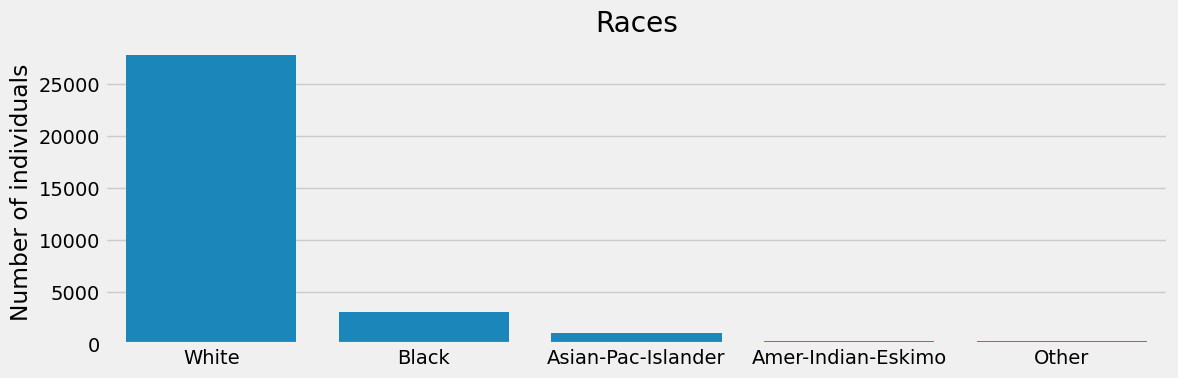

In [18]:
#Counting how many people identify with each race
race = df['race'].value_counts()
#visualizing
plt.style.use('fivethirtyeight')
fig1, ax1 = plt.subplots(figsize = (12,4))
g = sns.barplot(race)
g.set_title('Races')
g.set_ylabel('Number of individuals')
fig1.tight_layout()
plt.show()

What is the average age of men?

In [21]:
#average age of men
average_age = df.groupby('sex')['age'].mean()
man_average_age = average_age[1]
woman_average_age = average_age[0]
print(f'The Average age of the man in the research is {round(man_average_age,2)}')
print(f'The Average age of the woman in the resarch is {round(woman_average_age,2)}')

The Average age of the man in the research is 39.43
The Average age of the woman in the resarch is 36.86


What is the percentage of people who have a Bachelor's degree?

In [23]:
#percentage of people with a bachalor degree
bachelor_percentage = df['education'].value_counts(normalize=True)['Bachelors']
print(f'The percentage of people with a bachelors is {round((bachelor_percentage*100),2)}%')


The percentage of people with a bachelors is 16.45%


What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

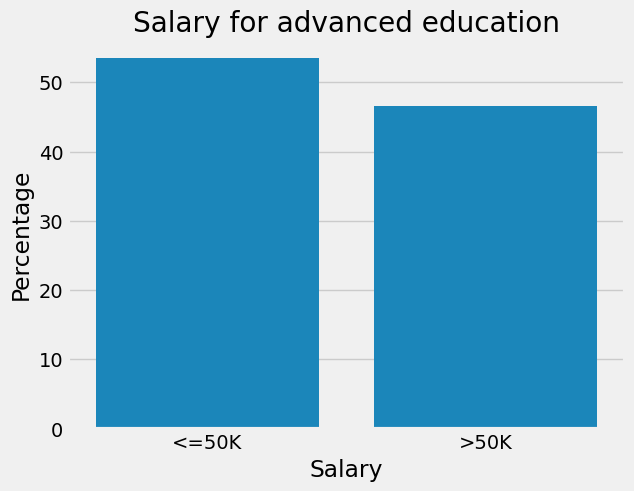

The percentage of people who have advanced education and earn more than 50K a year is 46.54%


In [31]:
#subseting the dataset to get only the educational levels wanted
advanced = ['Bachelors','Masters','Doctorate']
df['salary'] = df['salary'].astype(str)
advanced_df = df[df['education'].isin(advanced)] #subseting the dataframe
advanced_percentage = advanced_df['salary'].value_counts(normalize=True) #counting the salaries
advanced_percentage = advanced_percentage*100
a = sns.barplot(advanced_percentage)
a.set(title = 'Salary for advanced education')
a.set_xlabel('Salary')
a.set_ylabel('Percentage')
plt.show()
print(f'The percentage of people who have advanced education and earn more than 50K a year is {round(advanced_percentage[1],2)}%')

What percentage of people without advanced education make more than 50K?

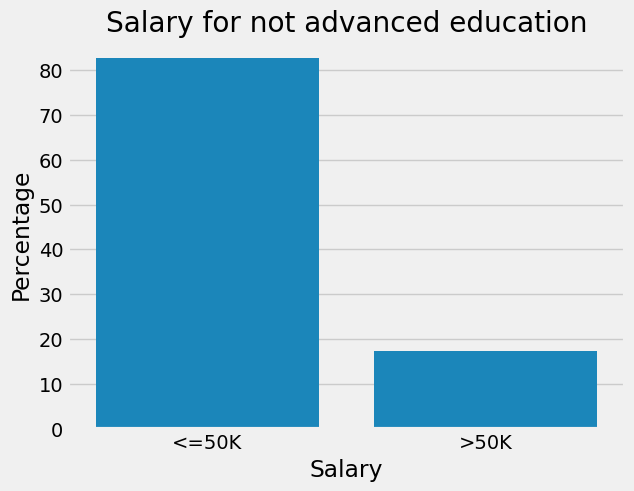

The percentage of people without advanced education that earn more than 50K a year is 17.37


In [32]:
#salarys of those without advanced education
not_advanced = df[~df['education'].isin(advanced)] #subseting for the opposite DF of the advanced education
simple = not_advanced['salary'].value_counts(normalize=True)
simple = simple*100
b = sns.barplot(simple)
b.set(title = 'Salary for not advanced education')
b.set_xlabel('Salary')
b.set_ylabel('Percentage')
plt.show()
print(f'The percentage of people without advanced education that earn more than 50K a year is {round(simple[1],2)}')

What is the minimum number of hours a person works per week?

In [40]:
#minimum of hours worked per week
#Filtering for values only bigger than the 2.5% percentile to avoid extreme low values
q1 = df['hours-per-week'].quantile(0.025)
df_min = df[df['hours-per-week']>=q1]
mini_hours = df_min['hours-per-week'].min()
print(f'The minimum of hours someone works per week is {mini_hours}')

The minimum of hours someone works per week is 12


What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

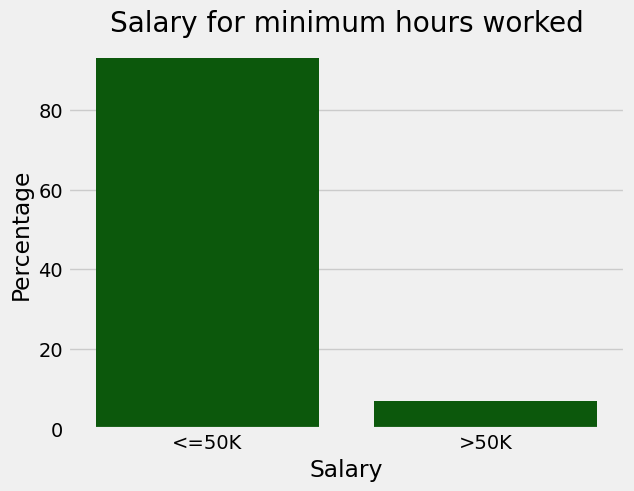

The percentage of people who work the minimum hours and make more than 50K a year is 6.94%


In [48]:
minimum_hours = df[df['hours-per-week']==mini_hours]
mini = minimum_hours['salary'].value_counts(normalize=True)
mini = mini*100
m = sns.barplot(mini, color = 'darkgreen')
m.set_title('Salary for minimum hours worked')
m.set_xlabel('Salary')
m.set_ylabel('Percentage')
plt.show()
print(f'The percentage of people who work the minimum hours and make more than 50K a year is {round(mini[1],2)}%')

What country has the highest percentage of people that earn >50K and what is that percentage?:

In [65]:
most = df.groupby('salary')['native-country'].value_counts().sort_values(ascending=False)
most_50 = most.loc['>50K'].sort_values(ascending=False)
country_50 = most_50[:1]
country = country_50.index[0]
num_50 = country_50.values[0]
percentage = (num_50/len(df))*100
print(f'The country with the highest percentage of people who earn more tha 50K is {country} and the percentage is {round(percentage,2)}')

The country with the highest percentage of people who earn more tha 50K is United-States and the percentage is 22.02


Identify the most popular occupation for those who earn >50K in India.

In [66]:
#most popular occupation for those who earn more tha 50k in India
india = df[df['native-country']=='India']
india_50 = india[india['salary']=='>50K']
most_india = india_50['occupation'].value_counts()
most_india_50 = most_india.iloc[0:1].index[0]
most_india_50
print(f' The most common occupation of those who earn more than 50K in India is {most_india_50}')

 The most common occupation of those who earn more than 50K in India is Prof-specialty
